# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## IMPORTANT: Guidelines for a proper conduct of the exercises
1. you should create code that is correct, simple, well organized, indented, commented, which uses self-explanatory names for variables and that is numerically efficient.
2. I expect a responsible interaction during the exercises: the questions should be more related to the conduction of the exercises and to the meaning of the results obtained than to the computational problems. Bugs are usual in coding; for this reason, sooner or later, one should learn to deal with them by oneself ... if you'll be able to, it will be your main achievement in this Laboratory!

## <span style="color:blue">  Numerical exercises 1</span>

### Exercise 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red">Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

### Esercizio 01.1 - Soluzione proposta

Nell'esercizio proposto si sono generati uniformemente $M = 10000$ numeri pseudocasuali nell'intervallo $[0, 1]$ e si è calcolata la stima del loro valor medio, $\langle r \rangle$, tramite una media a blocchi.

Per fare ciò, si è scelto di suddividere gli $M$ dati in $L = 100$ blocchi da $N=100$ elementi ciascuno; in ogni blocco si è calcolato il valor medio degli $N$ dati, utilizzato poi per stimare la media a blocchi e la corrispondente deviazione standard della media al variare di $L$.

Il risultato della simulazione è riportato nel grafico. Si osserva che la stima numerica di <r> risulta compatibile con il suo valore vero, ossia $1/2$.

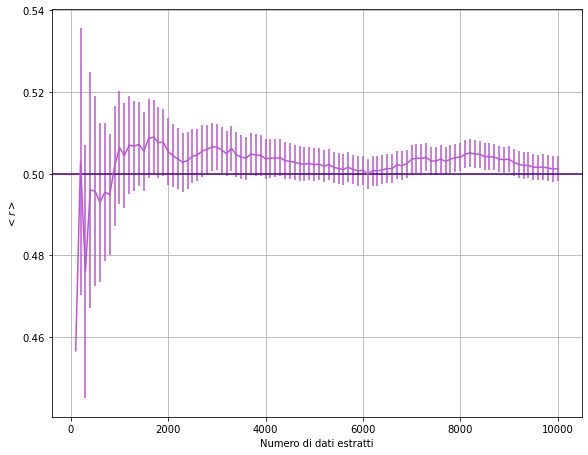

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es1/Average.dat') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[1]) for line in lines]
        err_prog = [float(line.split()[2]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, yerr=err_prog, color = 'mediumorchid')
plt.xlabel('Numero di dati estratti')
plt.ylabel('$<r>$')
plt.axhline(0.5, color='indigo') # horizontal
plt.grid(True)
#plt.show()
#plt.errorbar(x, err_prog)
plt.show()

In modo del tutto analogo a quanto spiegato sopra, si è stimata la varianza $\sigma^2$ estraendo $M$ numeri pseudocasuali uniformemente distribuiti in $[0, 1]$ e valutando la media a blocchi di $(r - 0.5)^2$, $r \in [0, 1]$. La stima numerica di $\sigma^2$ risulta compatibile con il suo valore vero, pari a $1/12$.

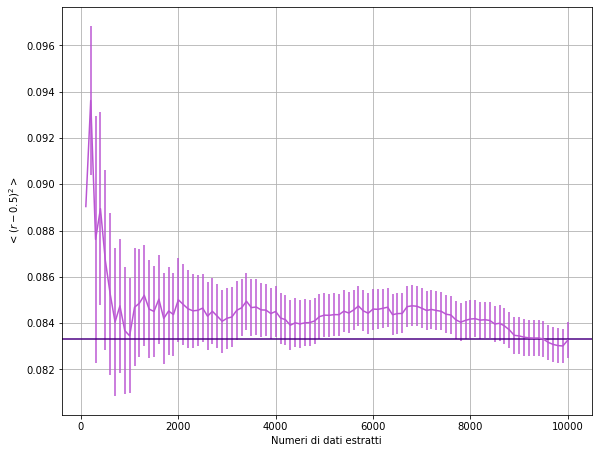

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


with open('Es1/Error.dat') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[1]) for line in lines]
        err_prog = [float(line.split()[2]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, yerr=err_prog, color = 'mediumorchid')
plt.xlabel('Numeri di dati estratti')
plt.ylabel('$ <(r - 0.5)^{2}> $')
plt.axhline(1./12., color='indigo') # horizontal
plt.grid(True)
plt.show()

The hypothesis is that the numbers $r$ are drawn from a uniform distribution. In Statistics we cannot prove that some random events are drawn from a particular distribution (Note, in fact, that such hypothesis is false: pseudo-random numbers are drawn from a deterministic algorithm!); we can try to estimate the probability that $r$ **are not** drawn from a uniform distribution. If this probability is low, we can safely reject this last hypothesis.
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
Pearson's cumulative test statistic $\chi^2$ is a measure of the error between observations, $O_i$, and expected values, $E_i$:
$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$
The numerator is a squared distance between observations, $O_i$, and expected values, $E_i$, and thus should be compared (at the denominator) with the expected squared fluctuations (variance) of the relative distribution. Why variance = $E_i$? 
The probability of getting exactly $k$ (independent) successes, each one with probability $p$, in $n$ trials is given by the Binomial distribution (see <a href="https://en.wikipedia.org/wiki/Binomial_distribution">this Wikipedia link</a>):
$$Pr(X=k) = {{n}\choose{k}} p^k (1-p)^{n-k} = \frac{n!}{k! (n-k)!} p^k (1-p)^{n-k}$$
The average of the Binomial distribution is $\langle X \rangle = np$, the variance is: $\sigma^2 = np (1-p)$. Thus if $p$ is small we have that $\sigma^2 \simeq np$, that is $\sigma^2 \simeq \langle X \rangle$ and this explains the denominator $E_i$ in $\chi^2$
</p>

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely ... <font color="red">but before judging</font>, you could compare the histogram of the values obtained for $\chi^2_j$ with the true probability distribution (see: <a href="https://en.wikipedia.org/wiki/Chi-squared_distribution">this Wikipedia link</a>).

Per effettuare il test del $\chi^2$, si è diviso $[0, 1]$ in $M = 100$ sotto-intervalli, di ampiezza $0.01$. In ciascuno di tali sotto-intervalli si sono generati uniformemente $N = 10000$ numeri pseudocasuali e si è contato quanti di essi cadessero nell'intervallo di interesse; una volta ottenuta la stima dei dati rientranti nell'i-esimo intervallo, si è calcolato $$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$ e si è iterato il processo per 100 volte.

I risultati delle 100 stime del $\chi^2$ sono riportati nell'istogramma seguente. Notiamo che la maggior parte dei valori si colloca intorno al $90$ e non al $100$ come ci si aspetterebbe.

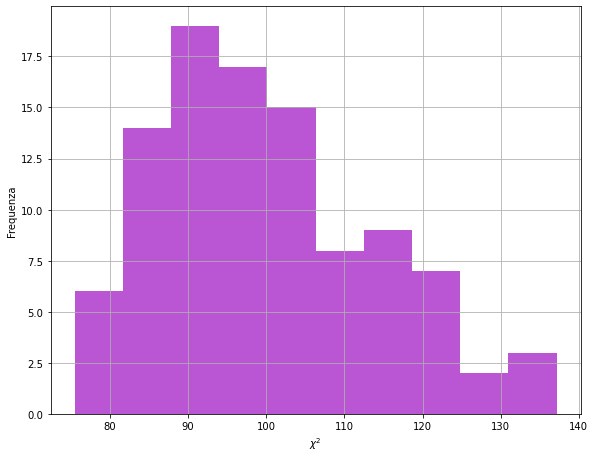

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es1/ChiSq.dat') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]

plt.figure(figsize=(9.5, 7.5))
plt.xlabel('$\chi^2$')
plt.ylabel('Frequenza')
plt.grid()
plt.hist(x, 10, color = 'mediumorchid')
plt.show()

### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

### Esercizio 01.2 - Soluzione proposta

Nell'esercizio proposto si sono generati numeri pseudocasuali tramite una distribuzione esponenziale e una distribuzione di Cauchy-Lorentz. Per poter generare la $x$ distribuita secondo la _PDF_ in esame, si è estratta una $y$ pseudocasuale in $[0, 1)$ (per l'esponenziale) e in $[0, 1]$ (per la Cauchy-Lorentz) e si è calcolata $x$ tramite inversione della funzione cumulativa; le _CDF_ risultano essere, rispettivamente:
- $F(x; \lambda) = 1 - e^{-\lambda x}$
- $F(x; \mu, \gamma) = \displaystyle{\frac{1}{\pi} \arctan(\frac{x-\mu}{\gamma}) + \frac{1}{2}}$

Si ricavano dunque le corrispondenti x, imponendo: $$ y = F(x; \lambda) $$ $$ y = F(x; \mu, \gamma) $$
E invertendo:
- $ x = - \displaystyle{\frac{1}{\lambda} \log(1 - y)}$
- $ x = \gamma \tan(\pi ( y - \displaystyle{\frac{1}{2}} ) ) + \mu $

Si sono poi generati $M= 10000$ dati distribuiti secondo le _PDF_ desiderate e per ciascuna di esse si è calcolata: $$S_N = \frac{1}{N}\sum_{i=1}^N x_i, N = 1, 2, 10, 100;$$

I risultati di tale calcolo sono presentati negli istogrammi seguenti. 

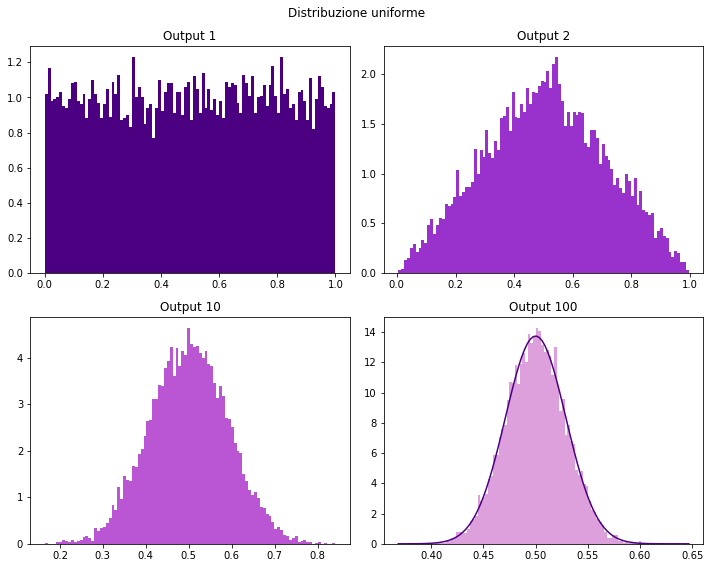


I migliori parametri $\mu$ e $\sigma$, ricavati dal fit Gaussiano per l'istogramma con 100 iterazioni, risultano essere:
- $\mu$ = 0.5000108001
- $\sigma$ = 0.029037794697737294

Coerentemente con quanto ci si aspetta per dati uniformemente distribuiti tra 0 e 1, per cui il valor medio è pari a $1/2$ e la varianza a $1/12$.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm

with open('Es1/output1') as f:
    lines = f.readlines()
    x = [float(line.split()[0]) for line in lines]

with open('Es1/output2') as f:
    lines = f.readlines()
    y = [float(line.split()[0]) for line in lines]

with open('Es1/output10') as f:
    lines = f.readlines()
    z = [float(line.split()[0]) for line in lines]

with open('Es1/output100') as f:
    lines = f.readlines()
    s = [float(line.split()[0]) for line in lines]

# Fit a normal distribution to the data: mean and standard deviation
mu, std = norm.fit(s) 

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Distribuzione uniforme')


# density = True, draw and return a probability density: each bin will display the bin's raw count divided by the total number of counts and the bin width, so that the area under the histogram integrates to 1
axes[0, 0].hist(x, 100, alpha=1, density=True, color='indigo')
axes[0, 0].set_title('Output 1')

axes[0, 1].hist(y, 100, alpha=1, density=True, color='darkorchid')
axes[0, 1].set_title('Output 2')

axes[1, 0].hist(z, 100, alpha=1, density=True, color='mediumorchid')
axes[1, 0].set_title('Output 10')

axes[1, 1].hist(s, 100, density=True, alpha=1, color='plum')
axes[1, 1].set_title('Output 100')

#Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
axes[1,1].plot(x, p, color = 'indigo')

plt.tight_layout()
plt.show()

md_text = f"""
I migliori parametri $\mu$ e $\sigma$, ricavati dal fit Gaussiano per l'istogramma con 100 iterazioni, risultano essere:
- $\mu$ = {mu}
- $\sigma$ = {std}

Coerentemente con quanto ci si aspetta per dati uniformemente distribuiti tra 0 e 1, per cui il valor medio è pari a $1/2$ e la varianza a $1/12$.
"""
md_cell = get_ipython().run_cell_magic('markdown', '', md_text)

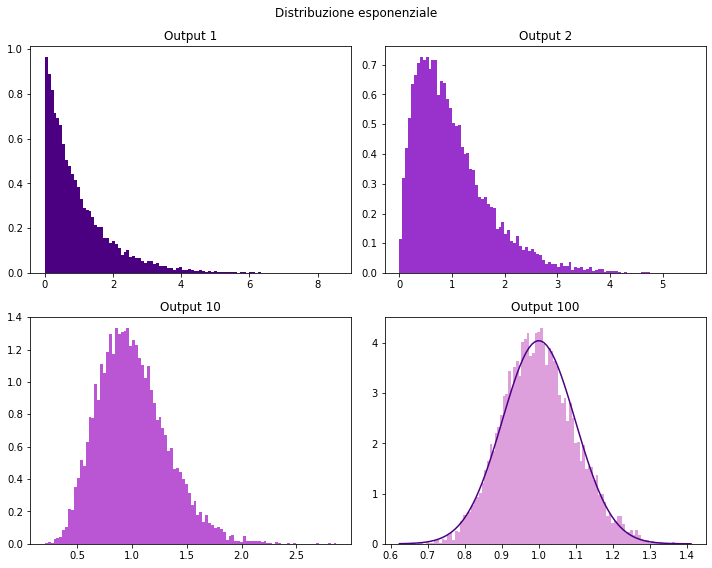


I migliori parametri $\mu$ e $\sigma$, ricavati dal fit Gaussiano per l'istogramma con 100 iterazioni, risultano essere:
- $\mu$ = 0.9998264965999999
- $\sigma$ = 0.09851158906206817

Coerentemente con quanto ci si aspetta per dati distribuiti esponenzialmente con $\lambda = 1$, per cui valor medio e varianza sono entrambi pari a $1$.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm

with open('Es1/output1') as f:
    lines = f.readlines()
    x = [float(line.split()[1]) for line in lines]

with open('Es1/output2') as f:
    lines = f.readlines()
    y = [float(line.split()[1]) for line in lines]

with open('Es1/output10') as f:
    lines = f.readlines()
    z = [float(line.split()[1]) for line in lines]

with open('Es1/output100') as f:
    lines = f.readlines()
    s = [float(line.split()[1]) for line in lines]

# Fit a normal distribution to the data: mean and standard deviation
mu, std = norm.fit(s) 

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Distribuzione esponenziale')


# density = True, draw and return a probability density: each bin will display the bin's raw count divided by the total number of counts and the bin width, so that the area under the histogram integrates to 1
axes[0, 0].hist(x, 100, alpha=1, density=True, color='indigo')
axes[0, 0].set_title('Output 1')

axes[0, 1].hist(y, 100, alpha=1, density=True, color='darkorchid')
axes[0, 1].set_title('Output 2')

axes[1, 0].hist(z, 100, alpha=1, density=True, color='mediumorchid')
axes[1, 0].set_title('Output 10')

axes[1, 1].hist(s, 100, density=True, alpha=1, color='plum')
axes[1, 1].set_title('Output 100')

#Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
axes[1,1].plot(x, p, color = 'indigo')

plt.tight_layout()
plt.show()

md_text = f"""
I migliori parametri $\mu$ e $\sigma$, ricavati dal fit Gaussiano per l'istogramma con 100 iterazioni, risultano essere:
- $\mu$ = {mu}
- $\sigma$ = {std}

Coerentemente con quanto ci si aspetta per dati distribuiti esponenzialmente con $\lambda = 1$, per cui valor medio e varianza sono entrambi pari a $1$.
"""
md_cell = get_ipython().run_cell_magic('markdown', '', md_text)

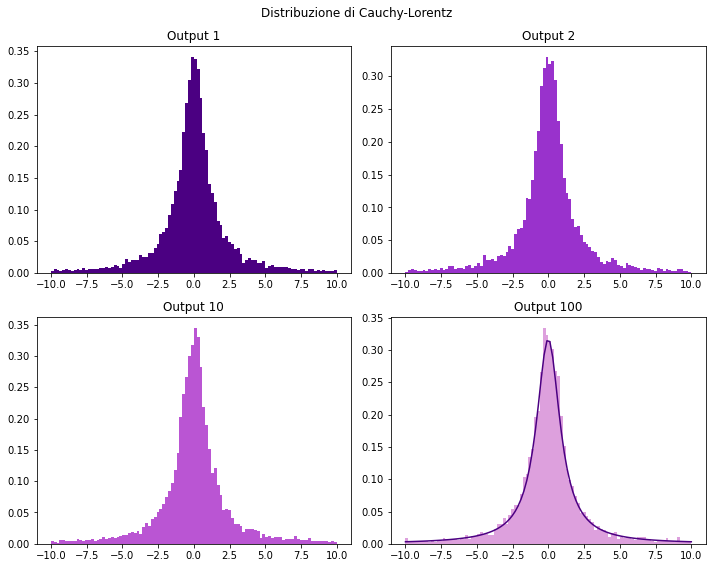


I migliori parametri $\mu$ e $\gamma$, ricavati dal fit Cauchy-Lorentz per l'istogramma con 100 iterazioni, risultano essere:
- $\mu$ = -0.010155445369008923
- $\gamma$ = 1.0041842049789673

Coerentemente con quanto ci si aspetta per dati distribuiti lungo una C-L con $\mu = 0$ e $\gamma = 1$.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy
#Lorentz distribution

with open('Es1/output1') as f:
    lines = f.readlines()
    x = [float(line.split()[2]) for line in lines]

with open('Es1/output2') as f:
    lines = f.readlines()
    y = [float(line.split()[2]) for line in lines]

with open('Es1/output10') as f:
    lines = f.readlines()
    z = [float(line.split()[2]) for line in lines]

with open('Es1/output100') as f:
    lines = f.readlines()
    s = [float(line.split()[2]) for line in lines]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Distribuzione di Cauchy-Lorentz')

axes[0, 0].hist(x, 100, alpha=1, density=True, color='indigo', range=(-10, 10))
axes[0, 0].set_title('Output 1')

axes[0, 1].hist(y, 100, alpha=1, density=True, color='darkorchid', range=(-10, 10))
axes[0, 1].set_title('Output 2')

axes[1, 0].hist(z, 100, alpha=1, density=True, color='mediumorchid', range=(-10, 10))
axes[1, 0].set_title('Output 10')

# Fit and plot for Output 100
bin_heights, bin_edges = np.histogram(s, bins=100, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
popt = cauchy.fit(s)
x_fit = np.linspace(-10, 10, 100)

axes[1, 1].hist(s, 100, alpha=1, density=True, color='plum', range=(-10, 10))
axes[1][1].plot(x_fit, cauchy.pdf(x_fit, *popt), color='indigo', label='Fit (Cauchy)')
axes[1, 1].set_title('Output 100')

plt.tight_layout()
plt.show()

md_text = f"""
I migliori parametri $\mu$ e $\gamma$, ricavati dal fit Cauchy-Lorentz per l'istogramma con 100 iterazioni, risultano essere:
- $\mu$ = {popt[0]}
- $\gamma$ = {popt[1]}

Coerentemente con quanto ci si aspetta per dati distribuiti lungo una C-L con $\mu = 0$ e $\gamma = 1$.
"""
md_cell = get_ipython().run_cell_magic('markdown', '', md_text)


Dagli istogrammi di cui sopra è possibile osservare l'effetto del _Teorema del limite centrale_, che afferma che, qualunque sia la distribuzione seguita da una variabile casuale, se i primi due _momenti_ (denominati $\mu$ e $\sigma^2$) della distribuzione esistono, allora la somma delle $N$ variabili (divisa per $N$) tende a distribuirsi lungo una Gaussiana con valor medio pari a $\mu$ e varianza $\sigma^2/N$. Grazie a tale risultato, si definisce la Gaussiana come un _attrattore_ nello spazio delle distribuzioni.

Si nota tuttavia che tale teorema vale nel caso di distribuzione uniforme ed esponenziale, per le quali i primi due momenti esistono finiti, come richiesto dalle ipotesi, ma la tesi cade per la distribuzione di Cauchy-Lorentz, che presenta secondo momento infinito. Tale _PDF_ dunque non soddisfa la versione più comune del _CLT_, ma permette di estendere il concetto di attrattore: anche la Lorentziana gioca infatti tale ruolo, così come altre infinite distribuzioni che soddisfano la condizione di _stabilità_ (ossia di invarianza sotto convoluzione).

### Exercise 01.3
- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

### Esercizio 01.3 - Soluzione proposta

Nell'esercizio proposto si è sfruttata la generazione di numeri pseudocasuali per simulare il lancio dell'ago sul reticolo. Tale simulazione è stata effettuata estraendo pseudocasualmente l'angolo $\theta$ con cui l'ago atterra e determinando se esso intersecasse una delle linee reticolari. 

Per estrarre $\theta$ senza ricorrere all'uso di $\pi$, si è scelto di generare una coppia di coordinate $(x, y)$ all'interno di un quadrato e si è poi verificato se $(x, y)$ rientrasse nella circonferenza unitaria; qualora $\sqrt{x^2 + y^2} \leq 1$, si è calcolato $\theta$ in funzione del segno di $y$, in modo da esplorare sia la semicirconferenza superiore sia quella inferiore:
- $y\geq0 \Rightarrow \theta = \arccos{ \displaystyle{\frac{x}{\sqrt{x^2 + y^2}}} }$
- $y\leq0 \Rightarrow \theta = -\arccos{ \displaystyle{\frac{x}{\sqrt{x^2 + y^2}}} }$

Ottenuto l'angolo, si è generata l'ordinata $y_{inf}$ dell'estremo inferiore dell'ago in $[0, d]$ e si è calcolata la posizione dell'estremo superiore: $$y_{sup} = y_{inf} + L\sin{\theta}$$

Qualora $y_{sup}$ risultasse minore di $0$ o maggiore di $d$, si è incrementato il contatore $N_{hit}$.

Tale simulazione è stata ripetuta per $M=10000$ volte; le medie a blocchi ottenute durante tali iterazioni sono riportate nel grafico.


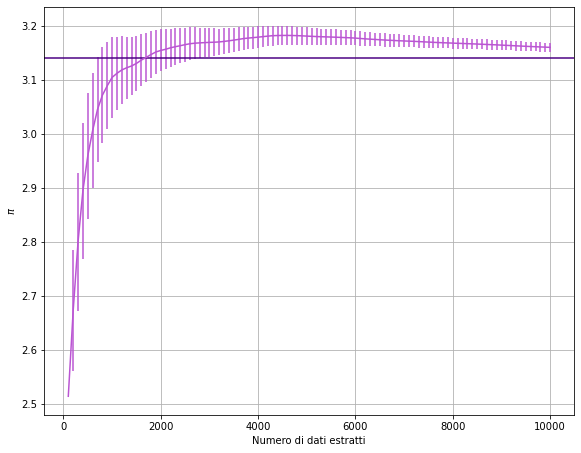

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es1/Buffon.dat') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[1]) for line in lines]
        err_prog = [float(line.split()[2]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, yerr=err_prog, color='mediumorchid')
plt.xlabel('Numero di dati estratti')
plt.ylabel('$\pi$')
plt.axhline(math.pi, color='indigo') # horizontal
plt.grid(True)
#plt.show()
#plt.errorbar(x, err_prog)
plt.show()